In [1]:
dataset_name = "W14_comb"
df_list = [
           "BES_Panel",
           "BES_reduced_with_na",
           "BES_reduced",
#            "BESnumeric"
          ]

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import pickle, os, gc, re

from IPython.display import display

import Jupyter_module_loader
from utility import display_components, display_pca_data, weighted_kde, setup_directories,\
                    get_manifest, get_small_files, clean_filename, create_subdir, amalgamate_waves

In [3]:
# you should clone this git to a subdirectory called 'BES_analysis_code' (in some directory - I call it BES_analysis - doesn't matter though)
%matplotlib inline
encoding = "ISO-8859-1"

(BES_code_folder, BES_small_data_files, BES_data_folder,
 BES_output_folder, BES_file_manifest, BES_R_data_files) = setup_directories()




In [4]:
# %%time
global BES_Panel, BES_numeric, BES_reduced, BES_reduced_with_na, BES_non_numeric
data_subfolder = BES_data_folder + dataset_name + os.sep

(manifest, dataset_filename, dataset_description, dataset_citation,
 dataset_start, dataset_stop, dataset_wave) = get_manifest(dataset_name, BES_file_manifest)

# dataset_filename = "BES2015_W8_v1.6.dta"

for df in df_list:
    if df=="BES_Panel":
        globals()[df]  = pd.read_msgpack(data_subfolder + dataset_filename.replace('.dta','.msgpack'))
#     elif df=="BES_reduced_with_na":
#         globals()[df] = pd.read_msgpack(data_subfolder + "BES_reduced" + '.msgpack')
#         nans = pd.read_msgpack(data_subfolder + "nans" + '.msgpack')
#         globals()[df][nans] = np.nan
# #         globals()[df] = temp[nans]
#         del nans
    else:
        globals()[df]  = pd.read_msgpack(data_subfolder + df + '.msgpack' )
        globals()[df].replace(-1,np.nan,inplace=True)
#         globals()[df] = globals()[df].apply(pd.to_numeric,downcast='integer')
    print(df+":")
    globals()[df].info(memory_usage='deep')    
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)

BES_Panel:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 73703 entries, 0 to 73702
Columns: 5692 entries, id to small_mii_catW10
dtypes: category(5483), datetime64[ns](31), float32(4), float64(154), int8(18), object(2)
memory usage: 506.4 MB
BES_reduced_with_na:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 73703 entries, 0 to 73702
Columns: 6864 entries, ageW1 to partyContactConW12_Yes
dtypes: float32(6864)
memory usage: 1.9 GB
BES_reduced:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 73703 entries, 0 to 73702
Columns: 7810 entries, ageW1 to partyContactConW12_Yes
dtypes: float32(4), int32(8), int8(7791), uint16(7)
memory usage: 552.5 MB
var_type (5692, 13)


In [13]:
# %%time
# # Create correlation matrix
# corr_matrix = np.corrcoef(BES_reduced_with_na, rowvar=False)

In [14]:
# %%time
# masked_df = np.ma.masked_array(BES_reduced_with_na.values,np.isnan(BES_reduced_with_na.values))

In [15]:
# %%time
# corr_matrix = np.ma.corrcoef(masked_df, rowvar=False)

In [16]:
# corr_matrix

In [6]:
# [x for x in BES_Panel.columns if "wt" in x]

In [10]:
# BES_Panel[['euMIISmallW7', 'euMIISmallW8']].notnull().sum()

In [11]:
# BES_Panel['profile_eurefvote'] 

In [20]:
Leavers   = (BES_Panel['profile_eurefvote'] == "Leave the EU")
Remainers = (BES_Panel['profile_eurefvote'] == "Stay/remain in the EU")

In [10]:
# first look at crosstabs (e.g. likely transitions to get a sense of similarity!)

# then backfill to get largest of amalgamated data

pd.crosstab( BES_Panel['euMIISmallW7'], BES_Panel['euMIISmallW8'],
             values= BES_Panel['wt_new_W8'], aggfunc=sum, normalize='index')*100
# BES_Panel[['euMIISmallW7', 'euMIISmallW8']]

euMIISmallW8,Immigration,Economy,Foreign policy,British/english identity,Protection of rights,Sovereignty/EU bureaucracy,Cosmopolitanism,Campaign/outcome fairness,Social identity/partisanship,EU integration/stability,Family,EU spending/regulations/cost,Other stability or uncertainty concern,No content to reason,Other
euMIISmallW7,,,,,,,,,,,,,,,
Immigration,61.431339,5.713422,1.779228,1.773648,0.388606,14.214792,0.834362,2.996039,0.343111,0.835652,0.671053,2.741537,0.247115,3.103641,2.926455
Economy,6.666552,56.016658,4.903982,0.485648,1.716877,4.437089,4.085101,4.823852,0.991798,0.408759,1.269811,2.115552,2.424199,5.968390,3.685730
Foreign policy,8.483874,21.248095,29.435540,0.488698,3.428666,3.150061,10.559450,3.539296,1.566595,0.864518,1.313806,1.771682,2.830825,5.666201,5.652693
British/english identity,20.537066,7.965131,1.801518,17.561137,0.176865,30.880536,0.000000,5.137121,0.896306,0.276078,0.264428,2.811820,0.224921,7.902947,3.564128
Protection of rights,5.260416,12.574065,4.075210,0.096128,48.274757,5.045229,7.473442,3.328142,5.469932,0.000000,0.265294,1.125218,1.350183,2.440380,3.221604
Sovereignty/EU bureaucracy,19.087384,3.645401,1.343851,4.104262,1.029638,55.582104,0.666056,4.283864,0.734497,0.605260,0.453932,2.390259,0.363589,2.950822,2.759082
Cosmopolitanism,3.940653,17.107753,9.312934,0.659280,4.409815,3.860054,38.936358,2.418263,2.829760,1.007561,1.270858,0.507982,1.968261,6.115144,5.655324
Campaign/outcome fairness,12.110814,15.830555,1.984768,1.522633,1.016305,12.690503,2.413201,33.448245,1.279695,1.333661,1.370322,1.611524,1.899817,7.195745,4.292211
Social identity/partisanship,8.658129,8.995642,2.763979,0.000000,7.077860,7.343940,16.742063,8.189945,21.587349,0.705078,0.500491,1.860229,5.134208,4.559479,5.881607


In [11]:
pd.crosstab( BES_Panel['euMIISmallW7'][Leavers], BES_Panel['euMIISmallW8'][Leavers],
             values= BES_Panel['wt_new_W8'][Leavers], aggfunc=sum, normalize='index')*100

euMIISmallW8,Immigration,Economy,Foreign policy,British/english identity,Protection of rights,Sovereignty/EU bureaucracy,Cosmopolitanism,Campaign/outcome fairness,Social identity/partisanship,EU integration/stability,Family,EU spending/regulations/cost,Other stability or uncertainty concern,No content to reason,Other
euMIISmallW7,,,,,,,,,,,,,,,
Immigration,63.589025,3.517500,1.159080,2.026471,0.223221,15.982406,0.550653,3.008047,0.316727,1.022689,0.521369,2.712383,0.191171,2.721384,2.457873
Economy,20.160781,32.306718,1.219378,1.566749,1.298008,17.412683,0.437821,6.182565,0.079811,0.716153,1.103296,2.768138,1.857133,7.119452,5.771316
Foreign policy,30.246455,6.237425,26.226315,0.000000,0.000000,13.040689,0.705300,7.849595,0.000000,3.645661,0.000000,2.215047,0.363355,5.044031,4.426127
British/english identity,21.007776,2.442215,1.849082,17.996035,0.223863,34.593248,0.000000,3.229103,0.661580,0.349439,0.334694,3.558996,0.284688,9.607076,3.862205
Protection of rights,33.601581,2.793990,0.000000,1.060499,13.325649,24.800223,0.000000,2.239062,1.174423,0.000000,0.000000,5.027893,3.818442,8.611126,3.547112
Sovereignty/EU bureaucracy,19.945078,2.044353,0.843178,4.626464,0.569286,58.811230,0.271720,3.614191,0.517551,0.629696,0.332154,2.549421,0.203142,3.003006,2.039531
Cosmopolitanism,29.787627,8.996285,2.449687,4.082299,2.378779,17.964893,14.087749,6.340794,2.198041,1.452498,0.000000,0.000000,7.181679,0.000000,3.079670
Campaign/outcome fairness,19.635921,6.126762,0.555287,2.745757,0.581979,20.926511,0.343110,31.816725,1.443154,1.756868,0.913575,2.282441,0.391870,6.863490,3.616550
Social identity/partisanship,24.275060,1.829729,0.000000,0.000000,0.000000,19.868353,2.191773,15.178947,19.731383,0.000000,1.286546,4.724852,0.000000,0.384130,10.529227


In [12]:
# ffil
# amalgamated_euMIISmall = BES_Panel[['euMIISmallW7', 'euMIISmallW8']].fillna(method="ffill",axis=1)["euMIISmallW8"]

In [12]:
amalgamated_euMIISmall = amalgamate_waves(BES_Panel, 'euMIISmallW', forward_fill=True)
    # euref_imm = amalgamate_waves(BES_reduced_with_na,"euRefVoteW",forward_fill=False)

Amalgamating variables: 
{7: 'euMIISmallW7', 8: 'euMIISmallW8'}


In [14]:
# amalgamated_euMIISmall

In [15]:
# [x for x in BES_reduced.columns if "sovereig" in x.lower()]

In [21]:
sovereignty = "Sovereignty/EU bureaucracy"
immigration = "Immigration"
SovOrImmLeavers = Leavers&((amalgamated_euMIISmall == sovereignty) | (amalgamated_euMIISmall == immigration))

Sov = (amalgamated_euMIISmall[SovOrImmLeavers] == sovereignty)
BES_sov = BES_reduced[SovOrImmLeavers]
drop_vars = [x for x in BES_reduced.columns if ("euRefVote" in x) or ("profile_eurefvote" in x)\
             or ("euMII" in x) or ("EUMII" in x)]
BES_sov = BES_sov.drop(drop_vars , axis=1)


In [22]:
BES_Panel["profile_eurefvote"].value_counts()

Stay/remain in the EU    26047
Leave the EU             23278
Don't know                 420
Name: profile_eurefvote, dtype: int64

In [23]:
amalgamated_euMIISmall[Leavers].value_counts()

Sovereignty/EU bureaucracy                3933
Immigration                               3391
Campaign/outcome fairness                  788
Economy                                    712
No content to reason                       548
EU spending/regulations/cost               455
British/english identity                   428
Other                                      400
Foreign policy                             164
EU integration/stability                   120
Family                                     116
Protection of rights                        97
Other stability or uncertainty concern      90
Social identity/partisanship                88
Cosmopolitanism                             82
Name: euMIISmallW7&8, dtype: int64

In [24]:
amalgamated_euMIISmall[Remainers].value_counts()

Economy                                   3717
Cosmopolitanism                           1190
Foreign policy                             992
Protection of rights                       899
No content to reason                       882
Campaign/outcome fairness                  778
Other                                      606
Immigration                                495
Other stability or uncertainty concern     449
Sovereignty/EU bureaucracy                 410
Social identity/partisanship               330
Family                                     202
EU spending/regulations/cost               197
EU integration/stability                    64
British/english identity                    34
Name: euMIISmallW7&8, dtype: int64

In [25]:
var_vals = BES_sov.var()
# var_vals[var_vals<1].hist(bins=1000);
(var_vals==0).sum()


111

In [26]:
def de_collinearise(df):
    # remove zero variance columns
    df = df.drop( df.columns[df.var()==0] , axis=1)
    return df

In [27]:
df = de_collinearise(BES_sov)
drops = [x for x in BES_reduced_with_na if re.match("small_mii_cat|ns_secW|age|miilabel",x)]
df = df.drop(drops, axis=1, errors ='ignore')

In [ ]:
# %%time
# # Create correlation matrix
# corr_matrix = df.corr().abs()

In [28]:
%%time
# Create correlation matrix
corr_matrix = np.corrcoef(df, rowvar=False)

Wall time: 12.7 s


In [29]:
corr_df = pd.DataFrame(corr_matrix, columns=df.columns, index=df.columns)

In [90]:
# age_drops = [x for x in BES_reduced_with_na if re.match("age",x)]


In [5]:
# BES_reduced_with_na[[x for x in BES_reduced_with_na if re.search("mii",x)]].notnull().sum()


In [6]:
# BES_Panel['miilabel']

In [7]:
# corr_df['mii_catW6_social care'].sort_values()


# choose *one of*: small_mii_cat, mii_cat
# small_mii_catW5_Immigration                                       0.999384
# mii_catW5_immigration                                             1.000000

# got to choose same thing with age

# and ns_sec/ns_sec_analytic

# choose one of miilabel and mii_cat

In [30]:
upper = corr_df.where(np.triu(np.ones(corr_df.shape), k=1).astype(np.bool))
high_corr_columns = [column for column in upper.columns if any(upper[column] >= 0.9)]
high_corr_columns

['dv2w2W2__Should definitely become independent',
 'likeSturgeonW5__Strongly like',
 'likeSNPW5__Strongly like',
 "fbInfo_3W5__Don't follow politics on facebook",
 'ptvSNPW6__Very likely',
 'likeSNPW7__Strongly like',
 'ptvSNPW7__Very likely',
 'likeSNPW8__Strongly like',
 'likeSNPW9__Strongly like',
 'ptvSNPW9__Very likely',
 'competentFarageW10__A great deal of competence',
 'likeSNPW10__Strongly like',
 'likeUKIPW10__Strongly like',
 'ptvSNPW10__Very likely',
 'ptvUKIPW10__Very likely',
 "fbInfo_3W12__Don't follow politics on facebook",
 'likeSNPW14__Strongly like',
 'generalElectionVoteUnsqueezeW4_Scottish National Party (SNP)',
 'generalElectionVoteUnsqueezeW11_Conservative',
 'generalElectionVoteUnsqueezeW11_Scottish National Party (SNP)',
 'partyIdW1_Scottish National Party (SNP)',
 'partyIdW3_Scottish National Party (SNP)',
 'welshElectionVoteListW1_Conservative',
 'welshElectionVoteListW1_United Kingdom Independence Party (UKIP)',
 'welshElectionVoteListW2_United Kingdom Indep

In [31]:
df = df.drop(high_corr_columns, axis=1, errors='ignore')

In [32]:
%%time
np.linalg.matrix_rank(df)

Wall time: 3min 24s


6738

In [33]:
df.shape

(7324, 7090)

In [34]:
qr = np.linalg.qr(df)

In [35]:
df.columns[np.abs(np.sum(qr[1],axis=0))<.5]

Index(['ldToneW5__5 - Focused mainly on putting forward their own policies and personalities',
       'snpSupportW8__Mainly leave', 'conUnitedW9__Very united',
       'labUnitedW10__Very united', 'infoSourceInternetW12__More than 2 hours',
       'bestOnMIIW1_Other party',
       'countryOfBirth_Other: European Union member country',
       'generalElectionVoteW2_Scottish National Party (SNP)',
       'generalElectionVoteW4_Plaid Cymru',
       'generalElectionVoteSqueezeW4_Liberal Democrat',
       ...
       'partyContactLDW3_Yes', 'blameScotUnion_cleggW3_Yes',
       'referendumContact_3W3_Yes', 'referendumContact_7W2_Yes',
       'referendumContact_4W2_Yes', 'partyContactLab_6W2_Yes',
       'conPriorities_costLiveW2_Yes', 'successReduceInequalityDKW12_Yes',
       'successReduceInequalityLabW12_Yes', 'RV1W2_Female'],
      dtype='object', length=263)

In [36]:
df = df.drop(df.columns[np.abs(np.sum(qr[1],axis=0))<.5],axis=1)

In [66]:
%%time
np.linalg.matrix_rank(df), df.shape

Wall time: 3min 56s


(6923, (7324, 7323))

In [41]:
def intersection(lst1, lst2): 
  
    # Use of hybrid method 
    temp = set(lst2) 
    lst3 = [value for value in lst1 if value in temp] 
    return lst3 

In [45]:
missing_vals = BES_reduced_with_na[ intersection(df.columns , BES_reduced_with_na.columns) ][SovOrImmLeavers].isnull()
missing_vals = (missing_vals.sum()/missing_vals.shape[0]).sort_values()
missing_vals.hist(bins=100);

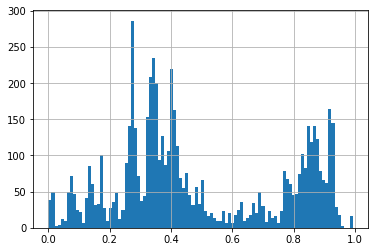

In [61]:
drop_vars = list(missing_vals[missing_vals>.5].index)
drop_vars


['generalElectionCertaintyUnsqW12__Completely certain',
 'labPartnerGreenW11_Would join Labour',
 'scotIndepGoodEngW3__Very good',
 'scotReferendumOutsideW1_Scotland should become an independent country',
 'labLookAfterBAW10__Very closely',
 'profile_gross_householdW11__£150,000 and over',
 'euKnow4W8_False',
 'generalElectionVoteUnsqueezeW12_Plaid Cymru',
 'generalElectionVoteUnsqueezeW12_United Kingdom Independence Party (UKIP)',
 'generalElectionVoteUnsqueezeW12_Liberal Democrat',
 'generalElectionVoteUnsqueezeW12_Scottish National Party (SNP)',
 'generalElectionVoteUnsqueezeW12_Conservative',
 'generalElectionVoteUnsqueezeW12_Labour',
 'generalElectionVoteUnsqueezeW12_Green Party',
 'voteMethodEurope_3W2_Yes',
 'ldUnitedW10__Very united',
 'lrUKIPW10__Right',
 'EUIntegrationLDW14__Protect our independence',
 'pidCommonPartyW13__Strongly agree',
 'taxSpendConW14__Government should increase taxes a lot and spend much more on health and social services',
 'localElectionVoteW7_United K

In [68]:
# drop_vars = []
BES_sov = df.drop(drop_vars,axis=1)

In [63]:
# SovOrImmLeavers = (BES_Panel["euRefVote"]=="Leave the EU")&((BES_Panel["euMIISmall"] == "Sovereignty/EU bureaucracy") | (BES_Panel["euMIISmall"] == "Immigration"))

# Sov = BES_Panel[SovOrImmLeavers]["euMIISmall"] == "Sovereignty/EU bureaucracy"
# BES_sov = BES_reduced[SovOrImmLeavers]
# BES_sov = BES_sov.drop([x for x in BES_sov.columns if "euRefVote" in x] , axis=1)
# BES_sov = BES_sov.drop([x for x in BES_sov.columns if "euMIISmall" in x], axis=1)

In [64]:
Treatment = "TwoLeaverTribes" + dataset_name
output_subfolder = BES_output_folder + Treatment + os.sep
if not os.path.exists( output_subfolder ):
    os.makedirs( output_subfolder )

In [65]:
from sklearn import datasets
from sklearn.decomposition import PCA, IncrementalPCA, NMF, TruncatedSVD, FastICA, FactorAnalysis, SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from gaussian_kde import gaussian_kde
from utility import display_components, display_pca_data, weighted_kde


In [66]:
# normalise data (subtract out the mean, divide through by standard deviation)
clean_feature_set_std = StandardScaler().fit_transform(BES_sov.values )
BES_std = pd.DataFrame(      clean_feature_set_std,
                             columns = BES_sov.columns,
                             index   = BES_sov.index      )

In [67]:
%%time
# 5 mins
## RUN (some variant of) PCA (potentially v slow!)
n_components = BES_std.shape[1]
n_components = 1
# n_components = 2
# (svd_solver='full', n_components='mle',whiten=True)
# decomp = PCA(n_components = n_components,svd_solver='full')
# decomp = FastICA(algorithm='deflation', fun='exp', fun_args=None, max_iter=1000,
#     n_components=None, random_state=None, tol=0.07, w_init=None, whiten=False) # 2h 1min 4s "fast"
# decomp = SparsePCA(n_components=n_components, alpha=2,max_iter=1000,n_jobs=4,tol=1e-10, verbose=True) # 5min
#
# alpha=2 -> 1hr

decomp = LinearDiscriminantAnalysis() ## ~10s ,n_components=30 -> 1.5 hrs
decomp_method = str(decomp).split("(")[0] 
# ,n_components=30

X_r = decomp.fit_transform(BES_std, Sov)

BES_decomp = pd.DataFrame(   X_r,
                             columns = range(0,n_components),
                             index   = BES_sov.index)

C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Wall time: 2min 8s


In [57]:
%%time
# shrinkage


# 5 mins
## RUN (some variant of) PCA (potentially v slow!)
n_components = BES_std.shape[1]
n_components = 1
# n_components = 2
# (svd_solver='full', n_components='mle',whiten=True)
# decomp = PCA(n_components = n_components,svd_solver='full')
# decomp = FastICA(algorithm='deflation', fun='exp', fun_args=None, max_iter=1000,
#     n_components=None, random_state=None, tol=0.07, w_init=None, whiten=False) # 2h 1min 4s "fast"
# decomp = SparsePCA(n_components=n_components, alpha=2,max_iter=1000,n_jobs=4,tol=1e-10, verbose=True) # 5min
#
# alpha=2 -> 1hr

decomp = LinearDiscriminantAnalysis(solver="eigen",shrinkage = 'auto') ## ~10s ,n_components=30 -> 1.5 hrs
decomp_method = str(decomp).split("(")[0] 
# ,n_components=30

X_r = decomp.fit_transform(BES_std, Sov)

BES_decomp = pd.DataFrame(   X_r,
                             columns = range(0,n_components),
                             index   = BES_sov.index)

Wall time: 4min 43s


In [58]:
# treatdir = BES_data_folder+Treatment
# subdir = BES_data_folder+Treatment+decomp_method
load_suff = "FactorAnalysis"
save = True # False => Load

if save & ( 'decomp' in globals() ): # SAVE    ##( 'decomp' not in globals() )
    decomp_method = str(decomp).split("(")[0] 
    subdir = output_subfolder + decomp_method
    fname = subdir+ os.sep + decomp_method
    # create dir, save decomp object, BES_decomp, BES_std    
    if not os.path.exists(subdir): os.makedirs(subdir)
    with open(fname+".pkl", "wb") as f: pickle.dump( decomp, f )
    BES_decomp.to_hdf(fname+".hdf"        , decomp_method)
    BES_std.to_hdf(   fname+"_std"+".hdf" , decomp_method)
    
else: # LOAD decomp results (default is SAVE)
    decomp_method = load_suff
    subdir = output_subfolder + os.sep + decomp_method    
    fname = subdir + os.sep + decomp_method
    if not os.path.exists(subdir): raise Exception(subdir + ' does not exist!')
    # load decomp object, BES_decomp, BES_std, n_components
    with open(fname+".pkl", "rb") as f: decomp = pickle.load(f) 
    BES_decomp = pd.read_hdf(fname+".hdf")
    BES_std    = pd.read_hdf(fname+"_std"+".hdf")
    n_components = decomp.components_.shape[0] 

In [59]:
# display_pca_data(n_components, decomp, BES_std)

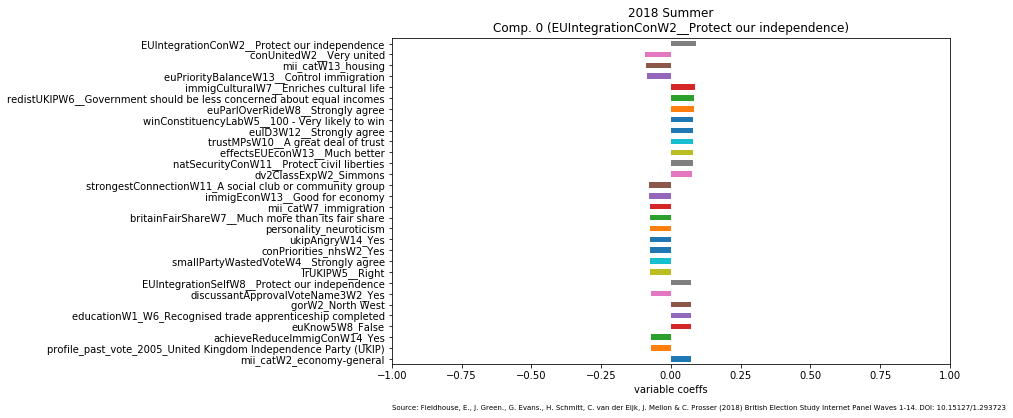

In [60]:
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                          BES_sov.columns, BES_decomp, manifest, 
                                                          save_folder = subdir,  
                                                          show_first_x_comps= 4, show_histogram = False)

In [126]:
subdir

'../BES_analysis_output/TwoLeaverTribesW14_comb\\LinearDiscriminantAnalysis'

In [134]:
# drop_vars

In [127]:
Sov.value_counts()

True     3933
False    3391
Name: euMIISmallW8, dtype: int64

In [109]:
# try again with all categories?

In [88]:
sovereignty = "Sovereignty/EU bureaucracy"
immigration = "Immigration"
SovOrImmLeavers = Leavers&amalgamated_euMIISmall.notnull()

Sov = amalgamated_euMIISmall[SovOrImmLeavers]
BES_sov = BES_reduced[SovOrImmLeavers]
drop_vars = [x for x in BES_reduced.columns if ("euRefVote" in x) or ("profile_eurefvote" in x)\
             or ("euMII" in x) or ("EUMII" in x)]
BES_sov = BES_sov.drop(drop_vars , axis=1)


In [89]:
df = de_collinearise(BES_sov)
drops = [x for x in BES_reduced_with_na if re.match("small_mii_cat|ns_secW|age|miilabel",x)]
df = df.drop(drops, axis=1, errors ='ignore')
BES_sov = df

In [90]:
# SovOrImmLeavers = (BES_Panel["euRefVote"]=="Leave the EU") & BES_Panel["euMIISmall"].notnull()
# #&((BES_Panel["euMIISmall"] == "Sovereignty/EU bureaucracy") | (BES_Panel["euMIISmall"] == "Immigration"))

# Sov_temp = BES_Panel[SovOrImmLeavers]["euMIISmall"]
# Sov = Sov_temp.cat.codes.copy()

# Sov[Sov_temp == "Sovereignty/EU bureaucracy"] = 0
# Sov[Sov_temp == "Immigration"] = 1
# Sov[(Sov_temp != "Sovereignty/EU bureaucracy") & (Sov_temp != "Immigration")] = 2

# Sov = BES_Panel[SovOrImmLeavers]["euMIISmall"]

# #== "Sovereignty/EU bureaucracy"
# BES_sov = BES_reduced[SovOrImmLeavers]
# BES_sov = BES_sov.drop([x for x in BES_sov.columns if "euRefVote" in x] , axis=1)
# BES_sov = BES_sov.drop([x for x in BES_sov.columns if "euMIISmall" in x], axis=1)

In [91]:
Treatment = "AllLeaverTribes"  + dataset_name
output_subfolder = BES_output_folder + Treatment + os.sep
if not os.path.exists( output_subfolder ):
    os.makedirs( output_subfolder )

In [92]:
# normalise data (subtract out the mean, divide through by standard deviation)
clean_feature_set_std = StandardScaler().fit_transform(BES_sov.values )
BES_std = pd.DataFrame(      clean_feature_set_std,
                             columns = BES_sov.columns,
                             index   = BES_sov.index      )

In [87]:
%%time
# 5 mins
## RUN (some variant of) PCA (potentially v slow!)
# n_components = BES_std.shape[1]

# n_components = 2
# (svd_solver='full', n_components='mle',whiten=True)
# decomp = PCA(n_components = n_components,svd_solver='full')
# decomp = FastICA(algorithm='deflation', fun='exp', fun_args=None, max_iter=1000,
#     n_components=None, random_state=None, tol=0.07, w_init=None, whiten=False) # 2h 1min 4s "fast"
# decomp = SparsePCA(n_components=n_components, alpha=2,max_iter=1000,n_jobs=4,tol=1e-10, verbose=True) # 5min
#
# alpha=2 -> 1hr

decomp = LinearDiscriminantAnalysis(n_components=2) ## ~10s ,n_components=30 -> 1.5 hrs
decomp_method = str(decomp).split("(")[0] 
# ,n_components=30

X_r = decomp.fit_transform(BES_std, Sov)

n_components = X_r.shape[1]

BES_decomp = pd.DataFrame(   X_r,
                             columns = range(0,n_components),
                             index   = BES_sov.index)

KeyboardInterrupt: 

In [93]:
%%time
# 5 mins
## RUN (some variant of) PCA (potentially v slow!)
# n_components = BES_std.shape[1]

# n_components = 2
# (svd_solver='full', n_components='mle',whiten=True)
# decomp = PCA(n_components = n_components,svd_solver='full')
# decomp = FastICA(algorithm='deflation', fun='exp', fun_args=None, max_iter=1000,
#     n_components=None, random_state=None, tol=0.07, w_init=None, whiten=False) # 2h 1min 4s "fast"
# decomp = SparsePCA(n_components=n_components, alpha=2,max_iter=1000,n_jobs=4,tol=1e-10, verbose=True) # 5min
#
# alpha=2 -> 1hr

decomp = LinearDiscriminantAnalysis(n_components=2, solver="eigen",shrinkage = 'auto') ## ~10s ,n_components=30 -> 1.5 hrs
decomp_method = str(decomp).split("(")[0] 
# ,n_components=30

X_r = decomp.fit_transform(BES_std, Sov)

n_components = X_r.shape[1]

BES_decomp = pd.DataFrame(   X_r,
                             columns = range(0,n_components),
                             index   = BES_sov.index)

Wall time: 8min 33s


In [94]:
# treatdir = BES_data_folder+Treatment
# subdir = BES_data_folder+Treatment+decomp_method
load_suff = "FactorAnalysis"
save = True # False => Load

if save & ( 'decomp' in globals() ): # SAVE    ##( 'decomp' not in globals() )
    decomp_method = str(decomp).split("(")[0] 
    subdir = output_subfolder + decomp_method
    fname = subdir+ os.sep + decomp_method
    # create dir, save decomp object, BES_decomp, BES_std    
    if not os.path.exists(subdir): os.makedirs(subdir)
    with open(fname+".pkl", "wb") as f: pickle.dump( decomp, f )
    BES_decomp.to_hdf(fname+".hdf"        , decomp_method)
    BES_std.to_hdf(   fname+"_std"+".hdf" , decomp_method)
    
else: # LOAD decomp results (default is SAVE)
    decomp_method = load_suff
    subdir = output_subfolder + os.sep + decomp_method    
    fname = subdir + os.sep + decomp_method
    if not os.path.exists(subdir): raise Exception(subdir + ' does not exist!')
    # load decomp object, BES_decomp, BES_std, n_components
    with open(fname+".pkl", "rb") as f: decomp = pickle.load(f) 
    BES_decomp = pd.read_hdf(fname+".hdf")
    BES_std    = pd.read_hdf(fname+"_std"+".hdf")
    n_components = decomp.components_.shape[0] 

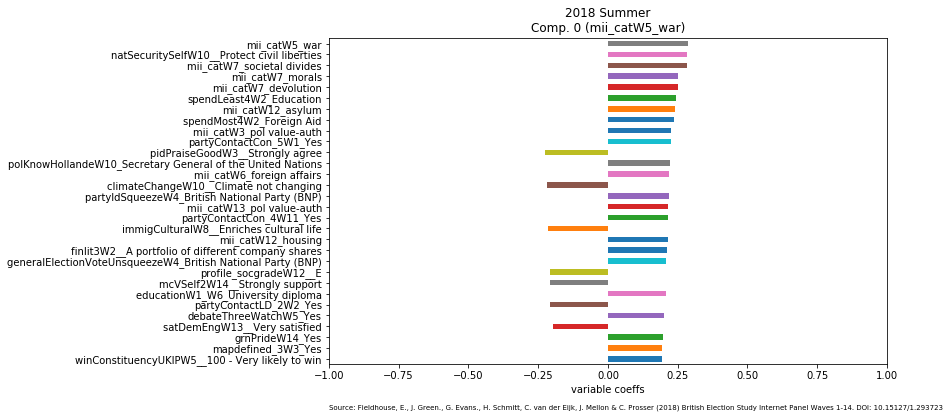

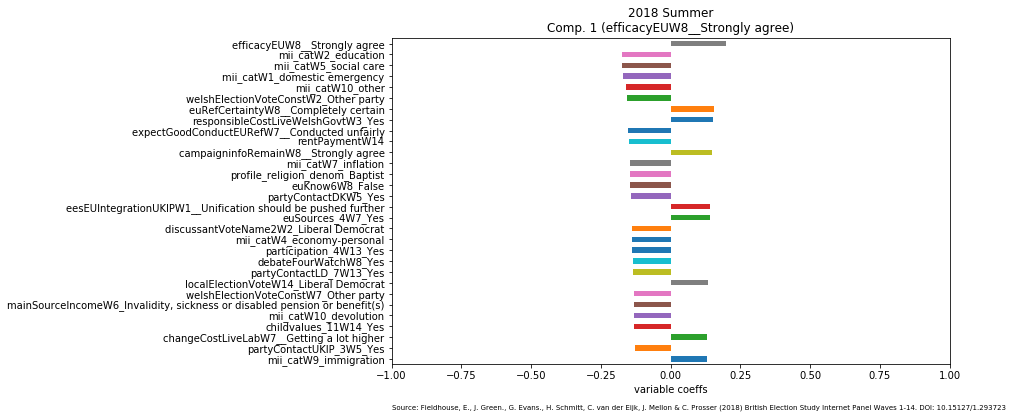

In [95]:
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                          BES_sov.columns, BES_decomp, manifest, 
                                                          save_folder = subdir,  
                                                          show_first_x_comps= 4, show_histogram = False)

In [96]:
decomp

LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage='auto',
              solver='eigen', store_covariance=False, tol=0.0001)

In [81]:
x_axis = 0
y_axis = 1

xlim = np.floor( BES_decomp.loc[ :, x_axis ].min() ), np.ceil( BES_decomp.loc[ :, x_axis ].max() )
ylim = np.floor( BES_decomp.loc[ :, y_axis ].min() ), np.ceil( BES_decomp.loc[ :, y_axis ].max() )

# SparsePCA
if decomp_method == 'SparsePCA':
    xlim =  BES_decomp.loc[ :, x_axis ].min() ,  BES_decomp.loc[ :, x_axis ].max() 
    ylim =  BES_decomp.loc[ :, y_axis ].min() ,  BES_decomp.loc[ :, y_axis ].max() 

KeyError: 'the label [1] is not in the [columns]'

In [ ]:
from itertools import cycle

colours = cycle('ycmkgbr')
markers = cycle('v^<>,oD*x+')

cat_col_mar_dict = {} # category-colour-marker dictionary
# basic set of common ones! 
cat_col_mar_dict['Conservative'] = ('b', '.')
cat_col_mar_dict['Conservative Party'] = ('b', '.')
cat_col_mar_dict['The Conservative candidate']       = ('b', 'x')
cat_col_mar_dict['Labour']       = ('r', '.')
cat_col_mar_dict['Labour Party']       = ('r', '.')
cat_col_mar_dict['The Labour candidate']       = ('r', 'x')
cat_col_mar_dict['Green Party']  = ('g', '.')
cat_col_mar_dict['The Green candidate']       = ('g', 'x')
cat_col_mar_dict['Plaid Cymru']  = ('k', '.')
cat_col_mar_dict['The Plaid Cymru candidate']  = ('k', 'x')
cat_col_mar_dict['Scottish National Party']           = ('c', '.')
cat_col_mar_dict['United Kingdom Independence Party'] = ('m', '.')
cat_col_mar_dict['The UKIP candidate'] = ('m', 'x')
cat_col_mar_dict['Liberal Democrat']                         = ('orange', '.')
cat_col_mar_dict['Liberal Democrats']                        = ('orange', '.')
cat_col_mar_dict['The Liberal Democrat candidate']                         = ('orange', 'x')

In [ ]:
# amalgamated_euMIISmall = amalgamated_euMIISmall.astype('category',categories=BES_Panel["euMIISmallW8"].cat.categories)

In [ ]:
%%time

graph_type = "non_ordinal_scatter/"
folder = output_subfolder +os.sep+ graph_type + os.sep
if not os.path.exists(folder):
    os.makedirs(folder)

dummy_list = ['euMIISmallW8']

# non-ordinal categories
fig_no = 0
for decomp_label_col in dummy_list:
    if decomp_label_col in ["profile_religion","country",
                            'polKnowMay','polKnowOsborne',
                            'polKnowClegg', 'polKnowBercow',
                            'polKnowMiliband', 'registered', 'ns_sec']:
        continue
    
    fig = plt.figure( figsize=(16,10) )

    decomp_label_categories = [ x for x in BES_reduced_with_na.columns if (decomp_label_col + "_") in x ]
    if len(decomp_label_categories) == 0:
        continue
        
#     if (decomp_label_col not in BES_reduced.columns):
#         if decomp_label_col in new_old_col_names.keys(): # variable renamed in transformation
#             decomp_label_categories = new_old_col_names[decomp_label_col]
#         else:
#             continue ## variable removed in transformation
#     else:
#         decomp_label_categories = decomp_label_col        

    # 'No party is best able to handle this issue'
    drop_cat_list = ['profile_education_age', 'profile_ethnicity_White British']
    for drop_cat in drop_cat_list:
        if drop_cat in decomp_label_categories:
            decomp_label_categories.remove(drop_cat)
            
    replace_dict = {'Scottish National Party (SNP)' : 'Scottish National Party',
                    'United Kingdom Independence Party (UKIP)' : 'United Kingdom Independence Party'}

    lab_to_cat = {}
    sample_sizes = {}
    for cat in decomp_label_categories:
        
        lab = re.search('_([^_]+)$',cat).groups()[0]
        if lab in replace_dict.keys(): # replace party name variants with single version
            lab = replace_dict[lab]
        
        if lab not in cat_col_mar_dict.keys(): # try to give parties consistent colour, marker pairs
            cat_col_mar_dict[lab] = (next(colours),next(markers))
        
        sample_sizes[lab] = sum( BES_reduced_with_na[ cat ][Leavers]==1 )
        lab_to_cat[lab] = cat

    for lab in sorted(sample_sizes, key=sample_sizes.get, reverse=True):
        
        samp = sample_sizes[lab]
            
        (col, mar) = cat_col_mar_dict[lab]

        cat_entries = BES_reduced_with_na[ lab_to_cat[lab] ][Leavers]==1
        
        plt.scatter(BES_decomp.loc[ cat_entries, x_axis ],
                    BES_decomp.loc[ cat_entries, y_axis ],
                    c= col,
                    marker=mar,
                    label=lab + "(N="+str(samp)+")",
                    edgecolors=col,
                    alpha = .9 )
    
    plt.xlim(xlim)
    plt.ylim(ylim)    
    
    plt.xlabel( comp_labels[x_axis] )
    plt.ylabel( comp_labels[y_axis] ) 
    plt.legend(prop={'size':8})
    plt.title('Decomposition of BES dataset; labelled variable: ' + decomp_label_col)
    
    fig.savefig( folder+decomp_label_col, bbox_inches='tight' )
    if fig_no >1:
        plt.close()
    fig_no = fig_no + 1
plt.show()

In [106]:
gc.collect()

0

In [150]:
target.cat.categories

Index(['Did not vote', 'Conservative Party', 'Labour Party',
       'Liberal Democrats', 'Scottish National Party', 'Plaid Cymru',
       'British National Party (BNP)', 'Green Party', 'Respect',
       'United Kingdom Independence Party (UKIP)', 'Veritas',
       'Some other party', 'Don't know'],
      dtype='object')

0         True
1         True
2         True
3         True
4        False
5        False
6        False
7         True
8         True
9         True
10        True
11       False
12        True
13        True
14        True
15       False
16        True
17       False
18        True
19       False
20        True
21        True
22        True
23        True
24       False
26       False
27        True
28        True
29        True
30        True
         ...  
68489    False
68490    False
68491    False
68492     True
68493    False
68494    False
68495    False
68496    False
68497     True
68498     True
68499    False
68500    False
68501    False
68502    False
68503    False
68504    False
68505    False
68506    False
68507     True
68508    False
68509    False
68510    False
68511    False
68512    False
68513    False
68514    False
68515     True
68516    False
68517    False
68518    False
Name: profile_past_vote_2005, Length: 58280, dtype: object

In [100]:
# [x for x in BES_reduced.columns if "profile_past" in x]

In [152]:
focal_variable = "profile_past_vote_2005"
target = BES_Panel[focal_variable]
train = BES_reduced.drop([x for x in BES_reduced.columns if focal_variable in x],axis=1)
mask = target.notnull() & target.apply(lambda x: x in ['Conservative Party', 'Labour Party',
       'Liberal Democrats'])
target = target[mask]
train = train[mask]

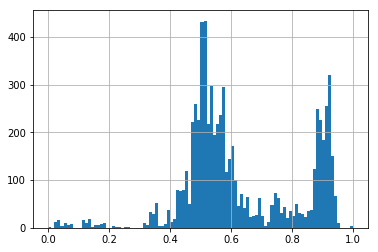

In [153]:
missing_vals = BES_reduced_with_na[ intersection(train.columns , BES_reduced_with_na.columns) ][mask].isnull()
missing_vals = (missing_vals.sum()/missing_vals.shape[0]).sort_values()
missing_vals.hist(bins=100);

In [154]:
# train.shape
drop_vars = list(missing_vals[missing_vals>.4].index)
drop_vars


['countryOfBirth_Northern Ireland',
 'countryOfBirth_Republic of Ireland',
 'countryOfBirth_Other: Commonwealth member country',
 'countryOfBirth_Other: Rest of world',
 'countryOfBirth_Other: European Union member country',
 'countryOfBirth_Wales',
 'countryOfBirth_Scotland',
 'countryOfBirth_England',
 'polKnowMilibandW1W2W3_Home secretary',
 'polKnowMilibandW1W2W3_Speaker of the House of Commons',
 'polKnowMilibandW1W2W3_Chancellor of the Exchequer',
 'polKnowMilibandW1W2W3_Deputy Prime Minister',
 'polKnowMilibandW1W2W3_Leader of the Labour Party',
 'polKnowCleggW1W2W3_Chancellor of the Exchequer',
 'polKnowCleggW1W2W3_Speaker of the House of Commons',
 'polKnowCleggW1W2W3_Leader of the Labour Party',
 'polKnowCleggW1W2W3_Deputy Prime Minister',
 'polKnowCleggW1W2W3_Home secretary',
 'riskScaleW8',
 'ageW8',
 'riskTakingW8__Very willing to take risks',
 'knowf2f3W11W12W14_False',
 'polAttentionW8__Pay a great deal of attention',
 'polKnowOsborneW1W2W3_Leader of the Labour Party',
 

In [155]:
%%time

decomp = LinearDiscriminantAnalysis(n_components=2, solver="eigen",shrinkage = 'auto')
decomp_method = str(decomp).split("(")[0] 

X_r = decomp.fit_transform(train.drop(drop_vars,axis=1), target)

n_components = X_r.shape[1]

BES_decomp = pd.DataFrame(   X_r,
                             columns = range(0,n_components),
                             index   = train.index)

Wall time: 35.8 s


In [156]:
BES_decomp.shape

(36806, 2)

In [157]:
x_axis = 0
y_axis = 1

xlim = np.floor( BES_decomp.loc[ :, x_axis ].min() ), np.ceil( BES_decomp.loc[ :, x_axis ].max() )
ylim = np.floor( BES_decomp.loc[ :, y_axis ].min() ), np.ceil( BES_decomp.loc[ :, y_axis ].max() )

# SparsePCA
if decomp_method == 'SparsePCA' or (decomp_method=='LinearDiscriminantAnalysis' and decomp.shrinkage=='auto'):
    xlim =  BES_decomp.loc[ :, x_axis ].min() ,  BES_decomp.loc[ :, x_axis ].max() 
    ylim =  BES_decomp.loc[ :, y_axis ].min() ,  BES_decomp.loc[ :, y_axis ].max() 

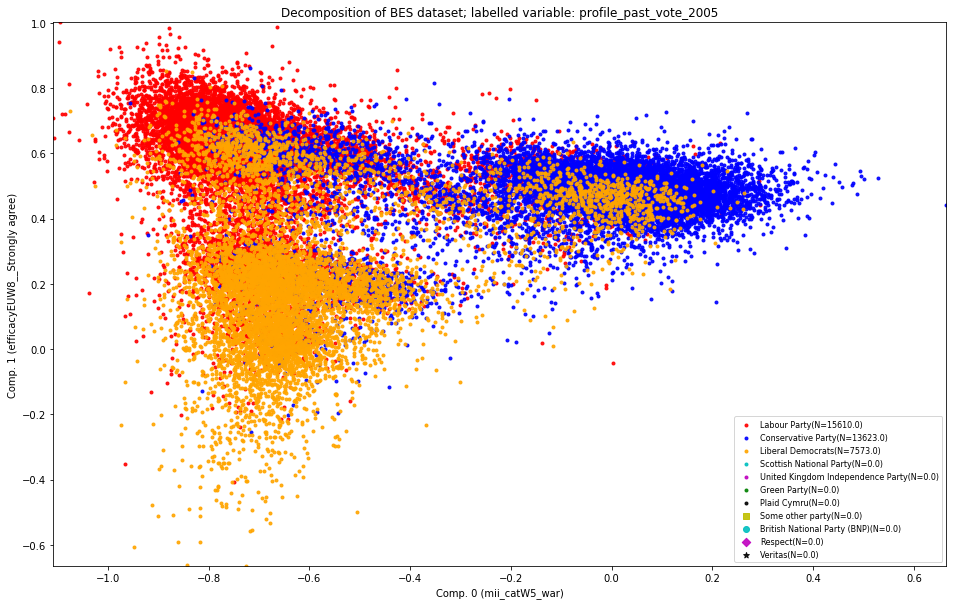

In [158]:
# %%time

graph_type = "non_ordinal_scatter/"
folder = output_subfolder +os.sep+ graph_type + os.sep
if not os.path.exists(folder):
    os.makedirs(folder)

dummy_list = [focal_variable]

# non-ordinal categories
fig_no = 0
for decomp_label_col in dummy_list:
    if decomp_label_col in ["profile_religion","country",
                            'polKnowMay','polKnowOsborne',
                            'polKnowClegg', 'polKnowBercow',
                            'polKnowMiliband', 'registered', 'ns_sec']:
        continue
    
    fig = plt.figure( figsize=(16,10) )

    decomp_label_categories = [ x for x in BES_reduced_with_na.columns if (decomp_label_col + "_") in x ]
    if len(decomp_label_categories) == 0:
        continue
            

    # 'No party is best able to handle this issue'
    drop_cat_list = ['profile_education_age', 'profile_ethnicity_White British']
    for drop_cat in drop_cat_list:
        if drop_cat in decomp_label_categories:
            decomp_label_categories.remove(drop_cat)
            
    replace_dict = {'Scottish National Party (SNP)' : 'Scottish National Party',
                    'United Kingdom Independence Party (UKIP)' : 'United Kingdom Independence Party'}

    lab_to_cat = {}
    sample_sizes = {}
    for cat in decomp_label_categories:
        
        lab = re.search('_([^_]+)$',cat).groups()[0]
        if lab in replace_dict.keys(): # replace party name variants with single version
            lab = replace_dict[lab]
        
        if lab not in cat_col_mar_dict.keys(): # try to give parties consistent colour, marker pairs
            cat_col_mar_dict[lab] = (next(colours),next(markers))
        
        sample_sizes[lab] = BES_reduced_with_na[ cat ][mask].sum()
        lab_to_cat[lab] = cat

    for lab in sorted(sample_sizes, key=sample_sizes.get, reverse=True):
        
        samp = sample_sizes[lab]
            
        (col, mar) = cat_col_mar_dict[lab]

        cat_entries = BES_reduced_with_na[ lab_to_cat[lab] ][mask]==True
        
        plt.scatter(BES_decomp.loc[ cat_entries, x_axis ],
                    BES_decomp.loc[ cat_entries, y_axis ],
                    c= col,
                    marker=mar,
                    label=lab + "(N="+str(samp)+")",
                    edgecolors=col,
                    alpha = .9 )
    
    plt.xlim(xlim)
    plt.ylim(ylim)    
    
    plt.xlabel( comp_labels[x_axis] )
    plt.ylabel( comp_labels[y_axis] ) 
    plt.legend(prop={'size':8})
    plt.title('Decomposition of BES dataset; labelled variable: ' + decomp_label_col)
    
    fig.savefig( folder+decomp_label_col, bbox_inches='tight' )
    if fig_no >1:
        plt.close()
    fig_no = fig_no + 1
plt.show()

In [145]:
# BES_reduced_with_na[ lab_to_cat[lab] ][mask].value_counts()

0.0    41723
1.0       15
Name: profile_past_vote_2005_Veritas, dtype: int64

In [147]:
BES_decomp.loc[ cat_entries==True, x_axis ]

130      0.831492
5175     0.621734
6320     0.590109
8203     1.148010
12912    1.092623
22496    1.264486
22888    0.394150
31139    0.486170
34395    0.679528
37184    0.279697
37209    0.286743
37297    1.382055
46090    1.129903
54808    0.762866
67180    1.233825
Name: 0, dtype: float64

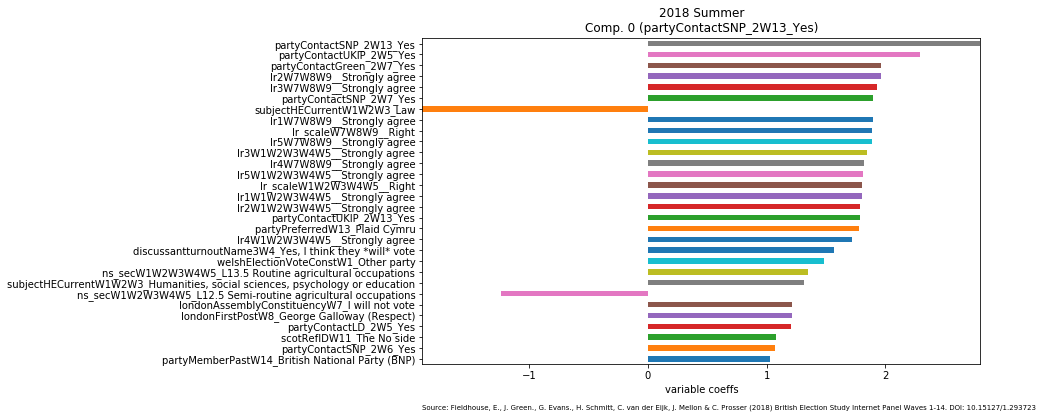

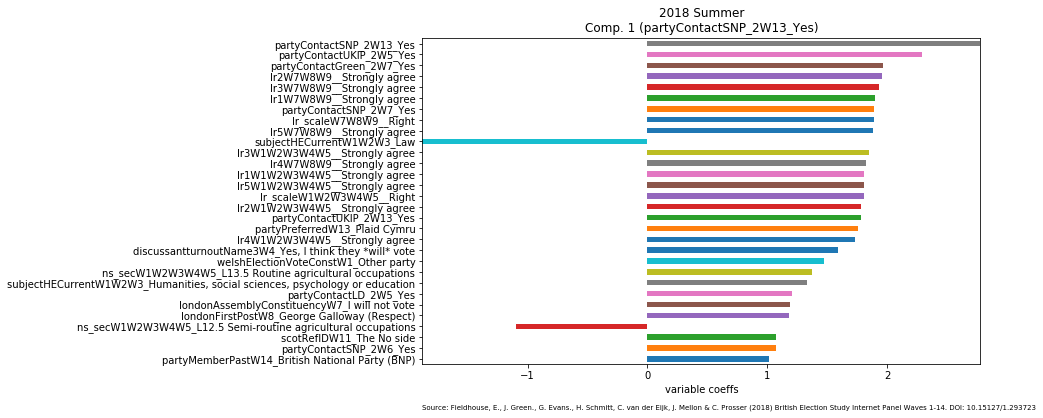

In [159]:
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                          train.drop(drop_vars,axis=1).columns, BES_decomp, manifest, 
                                                          save_folder = subdir,  
                                                          show_first_x_comps= 4, show_histogram = False)